<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# PROBLEM DEFINITION
## Dataset Information (pulled from UCI):
This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA. The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to yea), voted against, paired against, and announced against (these three simplified to nay), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known (these three simplified to an unknown disposition).

## For this project:
There's a popular sentiment growing in many of the major democracies - that the two major parties are the same, serving the same interests. With this project, we'll try to use machine learning to see if we can't reliably categorize the two major US parties' politicians based on their actual voting record!


# Dataset Details:
### Source:
Congressional Quarterly Almanac, 98th Congress, 2nd session 1984, Volume XL: Congressional Quarterly Inc. Washington, D.C., 1985.t

### Attribute Information
1. Class Name: 2 (democrat, republican)
2. handicapped-infants: 2 (y,n)
3. water-project-cost-sharing: 2 (y,n)
4. adoption-of-the-budget-resolution: 2 (y,n)
5. physician-fee-freeze: 2 (y,n)
6. el-salvador-aid: 2 (y,n)
7. religious-groups-in-schools: 2 (y,n)
8. anti-satellite-test-ban: 2 (y,n)
9. aid-to-nicaraguan-contras: 2 (y,n)
10. mx-missile: 2 (y,n)
11. immigration: 2 (y,n)
12. synfuels-corporation-cutback: 2 (y,n)
13. education-spending: 2 (y,n)
14. superfund-right-to-sue: 2 (y,n)
15. crime: 2 (y,n)
16. duty-free-exports: 2 (y,n)
17. export-administration-act-south-africa: 2 (y,n)



        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Read Data

In [113]:
# import all libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest

In [8]:
# Load data into a dataframe
data = 'house-votes-84.data'
df = pd.read_csv(data, header=None)
df.columns = ['Party', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
df.head()

,Party,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


# Perform initial EDA - cleaning data

In [14]:
# look at null data and column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Party   435 non-null    object
 1   2       435 non-null    object
 2   3       435 non-null    object
 3   4       435 non-null    object
 4   5       435 non-null    object
 5   6       435 non-null    object
 6   7       435 non-null    object
 7   8       435 non-null    object
 8   9       435 non-null    object
 9   10      435 non-null    object
 10  11      435 non-null    object
 11  12      435 non-null    object
 12  13      435 non-null    object
 13  14      435 non-null    object
 14  15      435 non-null    object
 15  16      435 non-null    object
 16  17      435 non-null    object
dtypes: object(17)
memory usage: 57.9+ KB


In [13]:
df.isna().sum()

Party    0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
dtype: int64

From the above, it can be seen that the data is clean (no null or N/A data), and that all columns need to be made binary.

In [45]:
# Convert all columns to dummy variables
df1 = pd.get_dummies(df, drop_first=True)

# Verify
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Party_republican  435 non-null    uint8
 1   2_n               435 non-null    uint8
 2   2_y               435 non-null    uint8
 3   3_n               435 non-null    uint8
 4   3_y               435 non-null    uint8
 5   4_n               435 non-null    uint8
 6   4_y               435 non-null    uint8
 7   5_n               435 non-null    uint8
 8   5_y               435 non-null    uint8
 9   6_n               435 non-null    uint8
 10  6_y               435 non-null    uint8
 11  7_n               435 non-null    uint8
 12  7_y               435 non-null    uint8
 13  8_n               435 non-null    uint8
 14  8_y               435 non-null    uint8
 15  9_n               435 non-null    uint8
 16  9_y               435 non-null    uint8
 17  10_n              435 non-null    u

,Party_republican,2_n,2_y,3_n,3_y,4_n,4_y,5_n,5_y,6_n,...,13_n,13_y,14_n,14_y,15_n,15_y,16_n,16_y,17_n,17_y
0,1,1,0,0,1,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,1
1,1,1,0,0,1,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,1,1,0,1,0
3,0,1,0,0,1,0,1,1,0,0,...,1,0,0,1,1,0,1,0,0,1
4,0,0,1,0,1,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,1


### Outliers:
Due to nature of data (all binary), there are no outliers

# Visualisation

[]

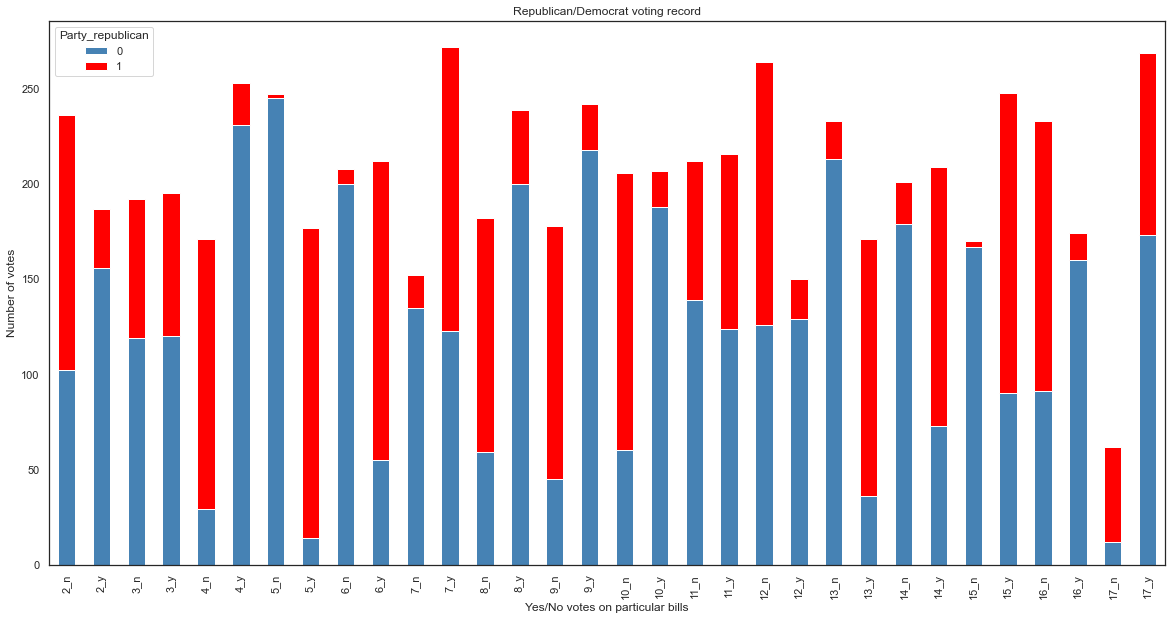

In [59]:
# Visualise as barplots
# Dataframe for barplot - sum voting records by party
plot_data = df1.groupby('Party_republican').sum()
# Transpose data for plotting
plot_data = plot_data.T

# Plot with seaborn
sns.set(style='white')
ax=plot_data.plot(kind='bar', stacked=True, color=['steelblue', 'red'], figsize=(20,10))
plt.title('Republican/Democrat voting record')
plt.ylabel('Number of votes')
plt.xlabel('Yes/No votes on particular bills')
plt.plot()

### Predictive Challenges: 
- Can we predict party affiliation based on voting record? Use both a supervised and an unsupervised algorithm to contrast

In [61]:
# Assign features and target
X = df1.drop('Party_republican', axis=1)
y = df1['Party_republican']

# All boolean data - no need for standardisation

# Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)


Text(0.5, 1.0, 'significance of each vote for party affiliation')

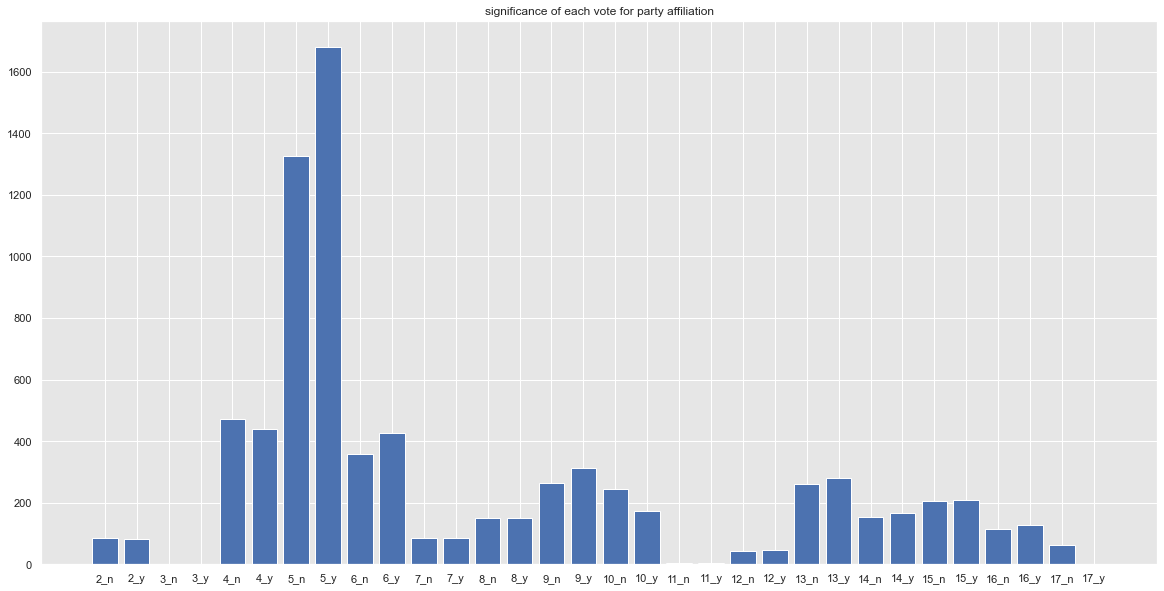

In [124]:
# Investigate which parameters have greatest impact
params = SelectKBest().fit(X_train, y_train)
plt.figure(figsize=(20,10))
plt.bar(x=X.columns, height=params.scores_)
plt.title('significance of each vote for party affiliation')

### Which classification algorithms to use?
- For supervised, Stacking, as per requirements. We will stack KNN, SVC, and Bernoulli Naive bayes, with logistic regression as the final estimator 
- On the same principle, our unsupervised algorithm will be K-Means clustering, assuming that party members will cluster together in votes

In [90]:
# import algorithms
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB

from sklearn.cluster import KMeans

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


The accuracy of the model on test data is 0.9655172413793104


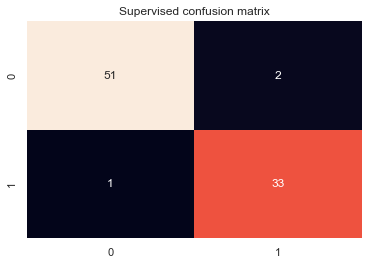

In [95]:
# Perform supervised modelling
layer_one = [
    ('knn', KNeighborsClassifier(metric='jaccard')),
    ('svc', LinearSVC()),
    ('bnb', BernoulliNB()),
]
supervised = StackingClassifier(estimators=layer_one, cv=3)
supervised = supervised.fit(X_train, y_train)

# Predict based on test data
y_pred = supervised.predict(X_test)

# Show results in confusion matrix
print("The accuracy of the model on test data is", accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
plt.title('Supervised confusion matrix')
plt.show()


In [112]:
print('KNN:', layer_one[0][1].fit(X_train, y_train).score(X_test, y_test))
print('SVC:', layer_one[1][1].fit(X_train, y_train).score(X_test, y_test))
print('BNB:', layer_one[2][1].fit(X_train, y_train).score(X_test, y_test))

KNN: 0.9195402298850575
SVC: 0.9655172413793104
BNB: 0.8735632183908046


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


AUC: 0.966426193118757


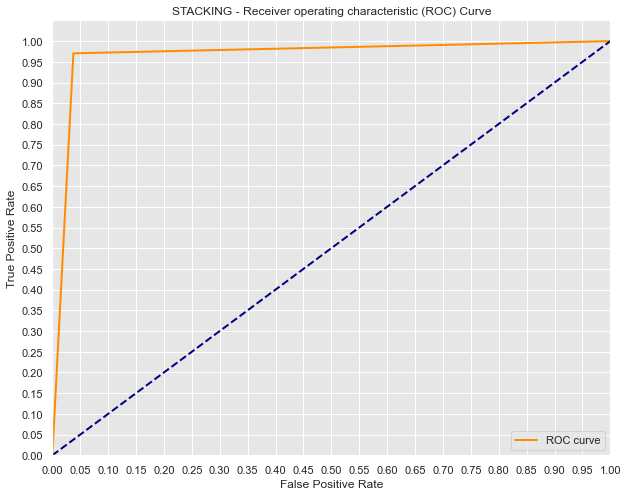

In [101]:
# Plot ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('STACKING - Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The accuracy of the model vs the real data is 0.8804597701149425


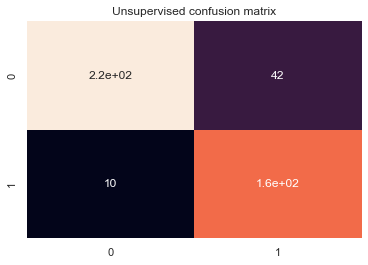

In [94]:
# Perform unsupervised modelling
unsupervised = KMeans(n_clusters=2, random_state=39)

# Predict based on full data
unsupervised.fit_transform(X)
y_full_pred = unsupervised.labels_
y_full_pred = 1-y_full_pred

# Show results in confusion matrix
print("The accuracy of the model vs the real data is", accuracy_score(y, y_full_pred))
sns.heatmap(confusion_matrix(y, y_full_pred), annot=True, cbar=False)
plt.title('Unsupervised confusion matrix')
plt.show()



AUC: 0.8915864098448368


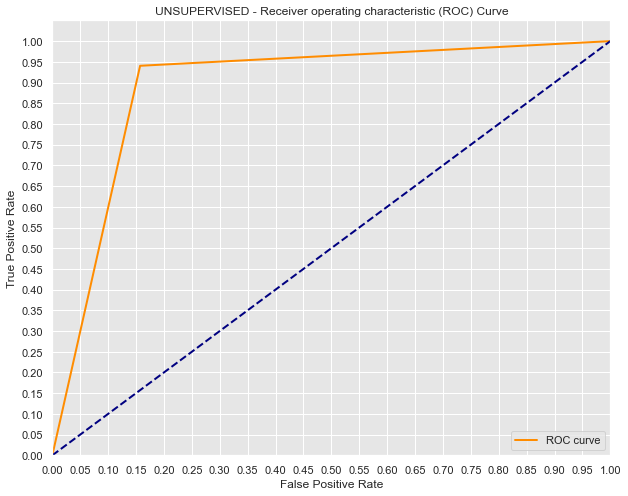

In [104]:
# Plot ROC
fpr, tpr, thresholds = roc_curve(y, y_full_pred)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('UNSUPERVISED - Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



